<a href="https://colab.research.google.com/github/eranga-de-saa/Motor_imagery_-CNN/blob/main/motor_imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!pip install mne

In [ ]:
!cp /content/drive/MyDrive/BCICIV_2a_gdf.zip /content

In [4]:
%%capture
!unzip /content/BCICIV_2a_gdf.zip -d data

In [5]:
import mne

In [6]:
raw=mne.io.read_raw_gdf('/content/data/BCICIV_2a_gdf/A04T.gdf', preload =True,
                         eog=['EOG-left', 'EOG-central', 'EOG-right'])
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

Extracting EDF parameters from /content/data/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


/usr/lib/python3.12/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


<RawGDF | A04T.gdf, 22 x 600915 (2403.7 s), ~100.9 MiB, data loaded>

In [7]:
raw.annotations

<Annotations | 610 segments: 1023 (26), 1072 (1), 32766 (7), 768 (288), ...>

In [8]:
raw.filter(8, 30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



<RawGDF | A04T.gdf, 22 x 600915 (2403.7 s), ~100.9 MiB, data loaded>

Using matplotlib as 2D backend.


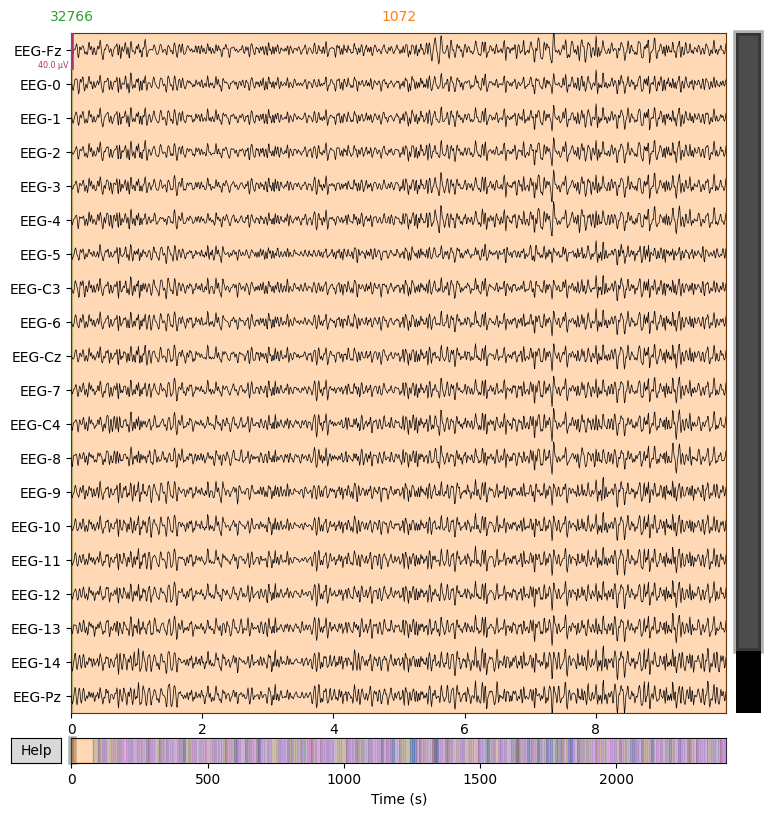

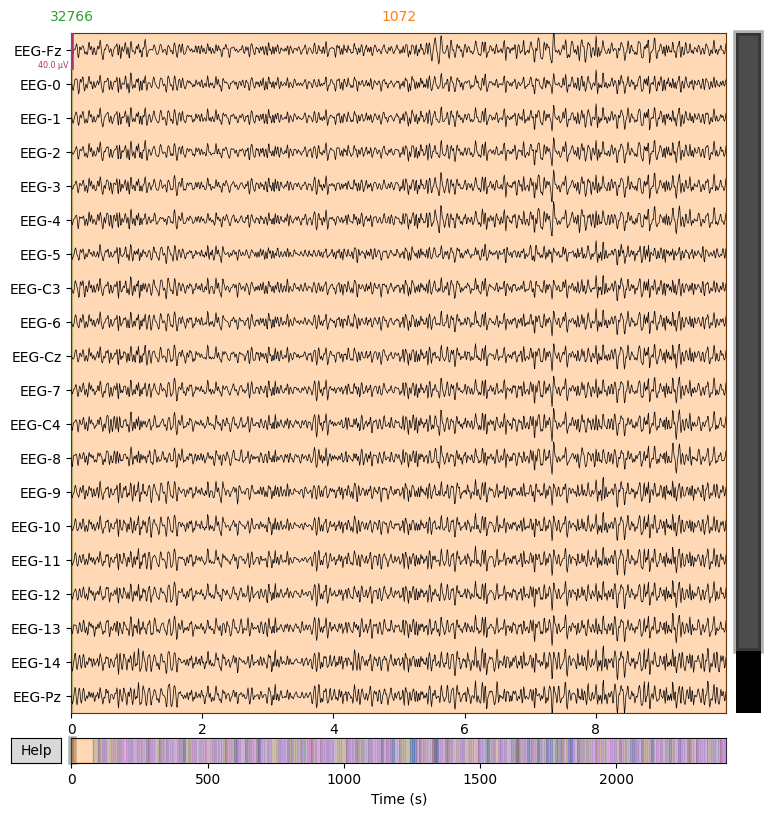

In [9]:
raw.plot()

In [10]:
# ica = mne.preprocessing.ICA(n_components = 20, random_state = 0)

In [11]:
# ica.fit(raw.copy().filter(8, 35))

In [12]:
#ica.plot_components(outlines="skirt")
# bad_idx, scores =  ica.find_bads_eog(raw,'s02', threshold=2)
#print(bad_idx)
# ica_exclude =[]
#ica.apply(raw.copy(),exclude = ica_exclude).plot()

In [13]:
events=mne.events_from_annotations(raw)
events[1]

Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]


{np.str_('1023'): 1,
 np.str_('1072'): 2,
 np.str_('32766'): 3,
 np.str_('768'): 4,
 np.str_('769'): 5,
 np.str_('770'): 6,
 np.str_('771'): 7,
 np.str_('772'): 8}

In [14]:
eventIds = [events[1]['769'] ,events[1]['770'] ]
eventIds

[5, 6]

In [15]:
events[0][0:20]

array([[    0,     0,     3],
       [    0,     0,     2],
       [19905,     0,     3],
       [20255,     0,     4],
       [20755,     0,     8],
       [22258,     0,     4],
       [22758,     0,     8],
       [24176,     0,     4],
       [24676,     0,     5],
       [26128,     0,     4],
       [26628,     0,     8],
       [28136,     0,     4],
       [28636,     0,     5],
       [30247,     0,     4],
       [30747,     0,     5],
       [32164,     0,     4],
       [32664,     0,     8],
       [34214,     0,     4],
       [34714,     0,     8],
       [36145,     0,     4]])

From the paper
'1023': 1 (Rejected trial),
'1072': 2 (Eye movements),
'276': 3 (eyes open)),
'277': 4 (eyes closed),
'32766':5 (Start of a new run),
'768': 6 (Start of a trial),
'769': 7 (class 1),
'770': 8 (class 2),
'771': 9 (class 3),
'772': 10 (class 4)

In [16]:
event_dict={
 'reject':1,
 'eye move':2,
 'eye open':3,
 'eye close':4,
 'new run':5,
 'new trial':6,
 'class 1':7,
 'class 2':8,
 #'class 3':9,
 #'class 4':10,

}


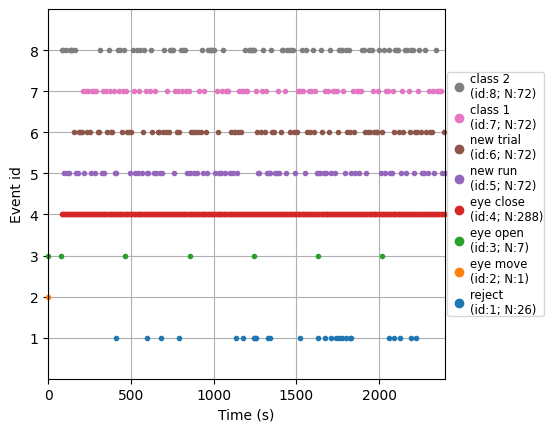

In [17]:
#https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],first_samp=raw.first_samp)


In [18]:
event_ids = {"left":7,"right":8 }

epoch = mne.Epochs(raw, events[0],event_id = [7,8])

Not setting metadata
144 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


Using data from preloaded Raw for 144 events and 176 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 176 original time points ...


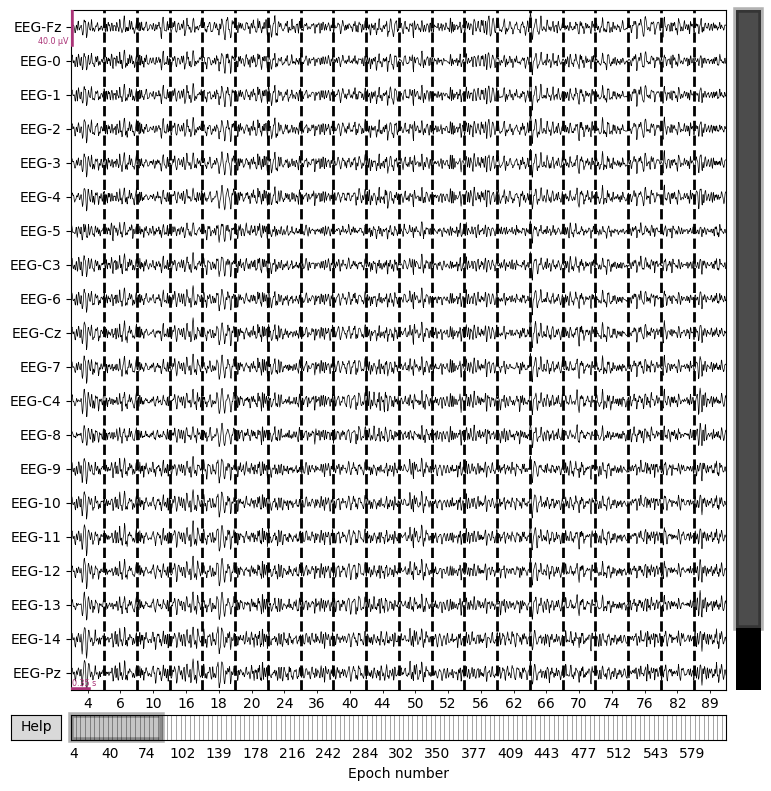

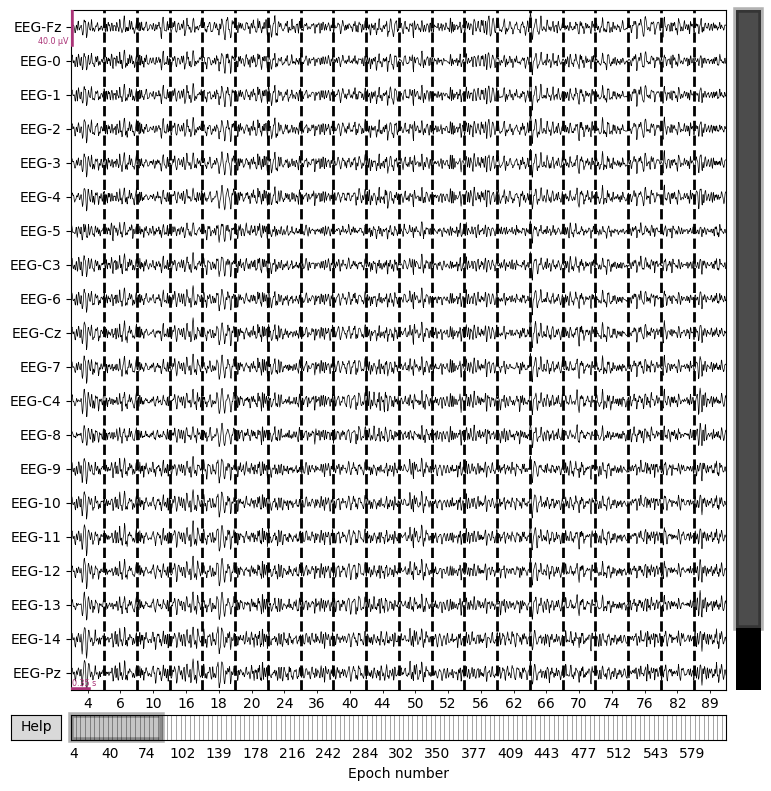

In [19]:
epoch.plot()

In [20]:
epoch.get_data().shape

Using data from preloaded Raw for 144 events and 176 original time points ...


(144, 22, 176)

In [21]:
labels =epoch.events[:,-1]

In [22]:
labels


array([8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 8, 7, 8,
       7, 8, 7, 8, 7, 8, 7, 8, 8, 7, 7, 8, 7, 8, 7, 8, 8, 8, 7, 7, 8, 7,
       8, 8, 7, 7, 7, 8, 7, 8, 8, 8, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8,
       7, 7, 8, 8, 8, 8, 8, 7, 7, 8, 7, 8, 7, 8, 8, 7, 8, 8, 8, 8, 7, 7,
       7, 8, 7, 8, 7, 7, 8, 7, 8, 7, 7, 8, 7, 7, 7, 8, 8, 8, 7, 8, 8, 7,
       7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 8, 7, 7, 8, 7, 8, 8, 8, 7, 8, 8, 7,
       8, 8, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7])

In [23]:
evoked_0 = epoch['7'].average()
evoked_1 = epoch['8'].average()

In [24]:
def read_data(path):
  raw=mne.io.read_raw_gdf(path,preload=True,
                          eog=['EOG-left', 'EOG-central', 'EOG-right'])
  raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
  raw.set_eeg_reference()
  raw.filter(0.5, 45)
  events=mne.events_from_annotations(raw)
  eventIds = [events[1]['769'] ,events[1]['770'] ]  # 769 left, 770 right
  eventIds
  epochs = mne.Epochs(raw, events[0], event_id= eventIds,on_missing ='warn', tmax=3)
  labels=epochs.events[:,-1]
  labels[labels == events[1]['769']] = 0
  labels[labels == events[1]['770']] = 1
  features=epochs.get_data()
  return features,labels


combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


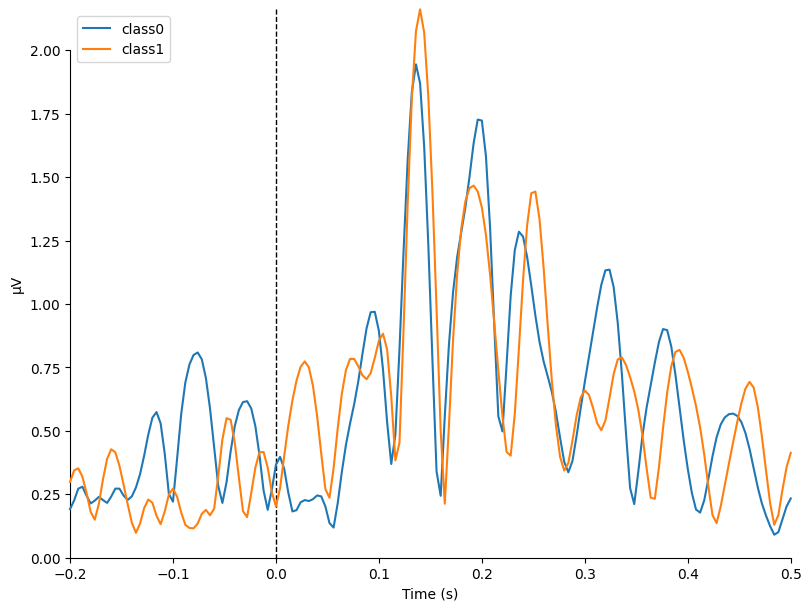

[<Figure size 800x600 with 1 Axes>]

In [25]:
#left,right,foot,tongue
dicts={'class0':evoked_0,'class1':evoked_1}
mne.viz.plot_compare_evokeds(dicts)

In [26]:
%%capture
features,labels,groups=[],[],[]
for i in range(1,10):
  feature,label=read_data(f'/content/data/BCICIV_2a_gdf/A0{i}T.gdf')
  features.append(feature)
  labels.append(label)
  groups.append([i]*len(label))

In [ ]:
import numpy as np
features=np.concatenate(features)
labels=np.concatenate(labels)
groups=np.concatenate(groups)

features.shape,labels.shape,groups.shape

In [ ]:
[i] * 10

In [ ]:
np.isnan(features).sum()

In [ ]:

unique, counts = np.unique(labels, return_counts=True)
unique, counts

In [31]:
import numpy as np
import pandas as pd


In [32]:
unique, counts = np.unique(groups, return_counts=True)
unique, counts

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([144, 144, 144, 144, 144, 144, 144, 144, 144]))

In [33]:
features = np.moveaxis(features, 1,2)
features.shape

(1296, 801, 22)

In [34]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU, ReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
# def cnnmodel():
#     clear_session()
#     model=Sequential()
#     model.add(Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(176,22)))#1
#     model.add(BatchNormalization())
#     model.add(LeakyReLU())
#     model.add(MaxPool1D(pool_size=2,strides=2))#2
#     model.add(Conv1D(filters=5,kernel_size=3,strides=1))#3
#     model.add(LeakyReLU())
#     model.add(MaxPool1D(pool_size=2,strides=2))#4
#     model.add(Dropout(0.5))
#     model.add(Conv1D(filters=5,kernel_size=3,strides=1))#5
#     model.add(LeakyReLU())
#     model.add(AveragePooling1D(pool_size=2,strides=2))#6
#     model.add(Dropout(0.5))
#     model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
#     model.add(LeakyReLU())
#     model.add(AveragePooling1D(pool_size=2,strides=2))#8
#     model.add(Conv1D(filters=5,kernel_size=3,strides=1))#9
#     model.add(LeakyReLU())
#     model.add(GlobalAveragePooling1D())#10
#     model.add(Dense(1,activation='sigmoid'))#11

#     model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
#     return model

# model=cnnmodel()
# model.summary()

In [ ]:
np.unique(labels) #7 left 8 right


In [36]:
# one hot encoding
# labels[labels == 7] = 0
# labels[labels == 8] = 1

In [37]:
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()

In [38]:
# accuracy=[]
# for train_index, val_index in gkf.split(features, labels, groups=groups):
#     train_features,train_labels=features[train_index],labels[train_index]
#     val_features,val_labels=features[val_index],labels[val_index]
#     scaler=StandardScaler()
#     train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
#     val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
#     model=cnnmodel()
#     model.fit(train_features,train_labels,epochs=50,batch_size=128,validation_data=(val_features,val_labels))
#     accuracy.append(model.evaluate(val_features,val_labels)[1])

In [39]:
# np.mean(accuracy)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D # new!

In [41]:
def cnnmodel_lenet():
    clear_session()
    model = Sequential()

    model.add(Conv1D(32, kernel_size=(3), activation='relu', input_shape=(801,22)))

    model.add(Conv1D(64, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

model=cnnmodel_lenet()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 799, 32)        │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 797, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 398, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 398, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,260,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,269,025 (12.47 MB)

 Trainable params: 3,269,025 (12.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
accuracy=[]
for train_index, val_index in gkf.split(features, labels, groups=groups):
    train_features,train_labels=features[train_index],labels[train_index]
    val_features,val_labels=features[val_index],labels[val_index]
    scaler=StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
    model=cnnmodel_lenet()
    model.fit(train_features,train_labels,epochs=50,batch_size=128,validation_data=(val_features,val_labels))
    accuracy.append(model.evaluate(val_features,val_labels)[1])

In [ ]:
np.mean(accuracy)

In [44]:
def cnnmodel_alexnet():
    clear_session()
    model = Sequential()

    model.add(Conv1D(96, kernel_size=(7), strides=(2), activation='relu', input_shape=(801,22)))
    model.add(MaxPooling1D(pool_size=(3), strides=(2)))
    model.add(BatchNormalization())

    model.add(Conv1D(256, kernel_size=(5), activation='relu'))
    model.add(MaxPooling1D(pool_size=(3), strides=(2)))
    model.add(BatchNormalization())

    model.add(Conv1D(256, kernel_size=(3), activation='relu'))
    model.add(Conv1D(384, kernel_size=(3), activation='relu'))
    model.add(Conv1D(384, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(pool_size=(3), strides=(2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))
    model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model


model=cnnmodel_alexnet()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 398, 96)        │        14,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 198, 96)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 198, 96)        │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 194, 256)       │       123,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 96, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 96, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 94, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 92, 384)        │       295,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 90, 384)        │       442,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 44, 384)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 44, 384)        │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16896)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    69,210,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,071,393 (332.15 MB)

 Trainable params: 87,069,921 (332.15 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
accuracy=[]
for train_index, val_index in gkf.split(features, labels, groups=groups):
    train_features,train_labels=features[train_index],labels[train_index]
    val_features,val_labels=features[val_index],labels[val_index]
    scaler=StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
    model=cnnmodel_alexnet()
    model.fit(train_features,train_labels,epochs=50,batch_size=128,validation_data=(val_features,val_labels))
    accuracy.append(model.evaluate(val_features,val_labels)[1])

In [ ]:
np.mean(accuracy)

In [ ]:
def cnnmodel_shallow():
    clear_session()
    model = Sequential()

    model.add(Conv1D(64, kernel_size=(3), activation='relu', input_shape=(801,22)))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

model=cnnmodel_shallow()
model.summary()

In [ ]:
accuracy=[]
for train_index, val_index in gkf.split(features, labels, groups=groups):
    train_features,train_labels=features[train_index],labels[train_index]
    val_features,val_labels=features[val_index],labels[val_index]
    scaler=StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
    model=cnnmodel_shallow()
    model.fit(train_features,train_labels,epochs=50,batch_size=128,validation_data=(val_features,val_labels))
    accuracy.append(model.evaluate(val_features,val_labels)[1])

In [ ]:
np.mean(accuracy)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)


In [ ]:
# ##  Model train and optimising
from sklearn import metrics
import pandas as pd

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [ ]:
cnn_shallow = cnnmodel_shallow()

model.fit(X_train, y_train, epochs=50, batch_size=128)

y_pred = model.predict(X_test).ravel()


y_pred_ann = np.around(y_pred)

# Train the models and record the results
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_ann)
auc = metrics.roc_auc_score(y_test, y_pred_ann)
model = "CNN Shallow "
result_table = result_table.append({'classifiers':model,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)


In [ ]:
cnn_shallow = cnnmodel_lenet()

model.fit(X_train, y_train, epochs=50, batch_size=128)

y_pred = model.predict(X_test).ravel()


y_pred_ann = np.around(y_pred)

# Train the models and record the results
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_ann)
auc = metrics.roc_auc_score(y_test, y_pred_ann)
model = "CNN Lenet "
result_table = result_table.append({'classifiers':model,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

In [ ]:
cnn_shallow = cnnmodel_alexnet()

model.fit(X_train, y_train, epochs=50, batch_size=128)

y_pred = model.predict(X_test).ravel()


y_pred_ann = np.around(y_pred)

# Train the models and record the results
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_ann)
auc = metrics.roc_auc_score(y_test, y_pred_ann)
model = "CNN Alexnet "
result_table = result_table.append({'classifiers':model,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()